<a href="https://colab.research.google.com/github/Lexi-Zhou/stats201-project-zzz/blob/main/Code/W3_4_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data loading

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 160)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/stats201_final_project/Week_3/"
FILE_NAME = "16_RMP_gender_finalized.csv"

FILE_PATH = os.path.join(DATA_DIR, FILE_NAME)

df = pd.read_csv(FILE_PATH)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (19687, 23)


,professor_name,school_name,department_name_clean,stu_tags,student_star,comments,tag_list,comment_gender_signal,prof_gender_label,star_rating,...,comments_basic,comments_expanded,comments_tokens,comments_final,n_tokens_final,professor_first_name,prof_gender_ssa,prof_gender_crosschecked,prof_likely_gender,prof_gender_finalized
0,Lynn Ketter,Northwest Florida State College,Education,RESPECTED CARING GIVES GOOD FEEDBACK,5.0,"Wonderful teacher. Basically all work is done in class. The grading is very clear, plus she gives feedback on every assignment, and lets you turn it in agai...","['RESPECTED', 'CARING', 'GIVES GOOD FEEDBACK']",female,female,3.7,...,"Wonderful teacher. Basically all work is done in class. The grading is very clear, plus she gives feedback on every assignment, and lets you turn it in agai...","wonderful teacher. basically all work is done in class. the grading is very clear, plus she gives feedback on every assignment, and lets you turn it in agai...","['wonderful', 'teacher', 'basically', 'work', 'class', 'grading', 'very', 'clear', 'plus', 'gives', 'feedback', 'assignment', 'lets', 'turn', 'points']",wonderful teacher basically work class grading very clear plus gives feedback assignment lets turn points,15,lynn,female,female,unknown,female
1,Lynn Ketter,Northwest Florida State College,Education,PARTICIPATION MATTERS,2.0,Discussion boards are mandatory. Use book for tests. Personally found her a little rude via e-mail and D2L. Seems very informative with some aspects of the ...,['PARTICIPATION MATTERS'],female,female,3.7,...,Discussion boards are mandatory. Use book for tests. Personally found her a little rude via e-mail and D2L. Seems very informative with some aspects of the ...,discussion boards are mandatory. use book for tests. personally found her a little rude via e-mail and d2l. seems very informative with some aspects of the ...,"['discussion', 'boards', 'mandatory', 'use', 'book', 'tests', 'personally', 'little', 'rude', 'e', 'mail', 'd', 'l', 'very', 'informative', 'aspects', 'clas...",discussion boards mandatory use book tests personally little rude e mail d l very informative aspects class changes things d l content so check stuff day,26,lynn,female,female,unknown,female
2,Lynn Ketter,Northwest Florida State College,Education,GIVES GOOD FEEDBACK LOTS OF HOMEWORK PARTICIPATION MATTERS,3.5,"Honestly, I didn\'t learn anything in this class but Ketter is amazing at giving great feedback and allowing resubmissions. Textbook is absolutely pointless...","['GIVES GOOD FEEDBACK', 'LOTS OF HOMEWORK', 'PARTICIPATION MATTERS']",unknown,female,3.7,...,"Honestly, I didn't learn anything in this class but Ketter is amazing at giving great feedback and allowing resubmissions. Textbook is absolutely pointless,...","honestly, i did not learn anything in this class but ketter is amazing at giving great feedback and allowing resubmissions. textbook is absolutely pointless...","['honestly', 'did', 'not', 'NEG_learn', 'class', 'ketter', 'amazing', 'giving', 'great', 'feedback', 'allowing', 'resubmissions', 'textbook', 'absolutely', ...",honestly did not NEG_learn class ketter amazing giving great feedback allowing resubmissions textbook absolutely pointless,15,lynn,female,female,unknown,female
3,Lynn Ketter,Northwest Florida State College,Education,GIVES GOOD FEEDBACK LOTS OF HOMEWORK SKIP CLASS? YOU WON\'T PASS.,4.0,She comes off a little cold at first but she\'s actually really nice. She has a lot of passion for teaching future educators. No tests in her class but quit...,"['GIVES GOOD FEEDBACK', 'LOTS OF HOMEWORK', ""SKIP CLASS? YOU WON\\'T PASS.""]",female,female,3.7,...,She comes off a little cold at first but she's actually really nice. She has a lot of passion for teaching future educators. No tests in her class but quite...,she comes off a little cold at first but she is actually really nice. she has a lot of passion for teaching future educators. no tests in her class but quit...,"['comes', 'little', 'cold',

In [ ]:
df_base = df.copy()


In [ ]:
empty_comments = (df_base["comments_final"].str.strip() == "").sum()
print("Empty comments_final:", empty_comments)

missing_dept = df_base["department_name_clean"].isna().sum()
print("Missing department:", missing_dept)


Empty comments_final: 0
Missing department: 0


In [ ]:
TEST_SIZE = 0.2
RANDOM_STATE = 42


# 2. Train/Test split (baseline standard)

In [ ]:
train_df, test_df = train_test_split(
    df_base,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=True
)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (15749, 23)
Test size: (3938, 23)


## 2.2 check distribution consistency

### 2.2.1 department

In [ ]:
dept_dist_train = train_df["department_name_clean"].value_counts(normalize=True)
dept_dist_test = test_df["department_name_clean"].value_counts(normalize=True)

pd.concat(
    [dept_dist_train.rename("train"), dept_dist_test.rename("test")],
    axis=1
).head(10)


,train,test
department_name_clean,,
English,0.113404,0.114779
Mathematics,0.085275,0.087354
Psychology,0.053273,0.054088
Biology,0.050733,0.046470
Chemistry,0.044003,0.048502
History,0.034351,0.034789
Business,0.033272,0.030726
Sociology,0.022668,0.025394
Education,0.021081,0.018029


### 2.2.2 rating categorization

In [ ]:
star_dist = pd.concat(
    [
        train_df["star_rating_category"].value_counts(normalize=True).rename("train"),
        test_df["star_rating_category"].value_counts(normalize=True).rename("test")
    ],
    axis=1
).sort_index()

star_dist


,train,test
star_rating_category,,
average,0.203695,0.203657
good,0.688425,0.688674
poor,0.107880,0.107669


## 2.3 save outputs

- datasets to use: train_df, test_df

In [ ]:

OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/stats201_final_project/Week_3/"


OUT_TRAIN = os.path.join(OUTPUT_DIR, "12_baseline_train.csv")
OUT_TEST  = os.path.join(OUTPUT_DIR, "12_baseline_test.csv")

train_df.to_csv(OUT_TRAIN, index=False)
test_df.to_csv(OUT_TEST, index=False)

print("Saved:")
print(OUT_TRAIN)
print(OUT_TEST)


Saved:
/content/drive/MyDrive/Colab Notebooks/stats201_final_project/Week_3/12_baseline_train.csv
/content/drive/MyDrive/Colab Notebooks/stats201_final_project/Week_3/12_baseline_test.csv


# 3. Baseline model

## 3.1 Gender-agnostic baseline

Overall high-frequency word stability (train/test Jaccard analysis)

In [ ]:
import ast
from collections import Counter

# Step 0: convert df_base['comments_tokens'] to list
def parse_tokens(token_str):
    try:
        return ast.literal_eval(token_str)
    except:
        return []

train_tokens_series = train_df['comments_tokens'].apply(parse_tokens)
test_tokens_series = test_df['comments_tokens'].apply(parse_tokens)


In [ ]:
# Step 1: build the word frequency table
def build_freq(tokens_series, min_count=5):
    all_tokens = [token for tokens in tokens_series for token in tokens]
    counter = Counter(all_tokens)
    # drop words that count < 5
    counter = {w: c for w, c in counter.items() if c >= min_count}
    freq_df = pd.DataFrame(counter.items(), columns=['word', 'count'])
    freq_df['freq'] = freq_df['count'] / sum(freq_df['count'])
    freq_df = freq_df.sort_values('freq', ascending=False).reset_index(drop=True)
    return freq_df

train_freq_df = build_freq(train_tokens_series, min_count=5)
test_freq_df = build_freq(test_tokens_series, min_count=5)


In [ ]:
# Step 2: Top-K high-frequency words
K = 20
topk_train = set(train_freq_df['word'].iloc[:K])
topk_test = set(test_freq_df['word'].iloc[:K])

print("Top-K train words:", topk_train)
print("Top-K test words:", topk_test)


Top-K train words: {'very', 'work', 'just', 'really', 'students', 'great', 'no', 'help', 'does', 'hard', 'good', 'easy', 'so', 'class', 'tests', 'teacher', 'not', 'professor', 'lot', 'best'}
Top-K test words: {'helpful', 'very', 'work', 'just', 'really', 'students', 'great', 'no', 'does', 'hard', 'good', 'easy', 'so', 'class', 'tests', 'teacher', 'not', 'professor', 'lot', 'best'}


In [ ]:
# Step 3: Jaccard similarity
intersection = topk_train & topk_test
union = topk_train | topk_test
jaccard = len(intersection) / len(union)

print(f"Jaccard similarity between train/test Top-{K} words: {jaccard:.3f}")


Jaccard similarity between train/test Top-20 words: 0.905


## 3.2 Gender-aware baseline:

Gender-differentiated word usage (difference of proportions & DAR evaluation)

In [ ]:
# Step 0: convert df_base['comments_tokens'] to list
def parse_tokens(token_str):
    try:
        return ast.literal_eval(token_str)
    except:
        return []

train_tokens_series = train_df['comments_tokens'].apply(parse_tokens)
test_tokens_series  = test_df['comments_tokens'].apply(parse_tokens)

# Divide the dataset by finalized gender label
train_female_df = train_df[train_df['prof_gender_finalized'] == 'female']
train_male_df   = train_df[train_df['prof_gender_finalized'] == 'male']
test_female_df  = test_df[test_df['prof_gender_finalized'] == 'female']
test_male_df    = test_df[test_df['prof_gender_finalized'] == 'male']

# Correspond to tokens lists
train_tokens_female = train_female_df['comments_tokens'].apply(parse_tokens)
train_tokens_male   = train_male_df['comments_tokens'].apply(parse_tokens)
test_tokens_female  = test_female_df['comments_tokens'].apply(parse_tokens)
test_tokens_male    = test_male_df['comments_tokens'].apply(parse_tokens)


In [ ]:
# Step 1: word frequency + proportion
def build_freq(tokens_series, min_count=5):
    """
    tokens_series: pd.Series，every element is a list of tokens
    min_count: drop less frequent words
    """
    all_tokens = [token for tokens in tokens_series for token in tokens]
    counter = Counter(all_tokens)

    counter = {w: c for w, c in counter.items() if c >= min_count}
    total_count = sum(counter.values())

    freq_df = pd.DataFrame(counter.items(), columns=['word', 'count'])
    freq_df['freq'] = freq_df['count'] / total_count
    freq_df = freq_df.sort_values('freq', ascending=False).reset_index(drop=True)
    return freq_df

train_freq_female = build_freq(train_tokens_female)
train_freq_male   = build_freq(train_tokens_male)
test_freq_female  = build_freq(test_tokens_female)
test_freq_male    = build_freq(test_tokens_male)


In [ ]:
# Step 2: Calculate difference of proportions
def compute_D_w(freq_female_df, freq_male_df):
    """
    D_w = freq_F - freq_M
    """
    D_df = pd.merge(freq_female_df[['word','freq']], freq_male_df[['word','freq']],
                    on='word', how='outer', suffixes=('_F','_M')).fillna(0)
    D_df['D_w'] = D_df['freq_F'] - D_df['freq_M']
    return D_df

train_D_df = compute_D_w(train_freq_female, train_freq_male)
test_D_df  = compute_D_w(test_freq_female, test_freq_male)


In [ ]:
# Step 3: Calculate DAR
def compute_DAR(train_D_df, test_D_df):
    """
    DAR = Proportion of words in the training set and test set
          that are aligned in the sign of D_w
    """
    merged = pd.merge(train_D_df[['word','D_w']], test_D_df[['word','D_w']],
                      on='word', how='inner', suffixes=('_train','_test'))
    sign_consistent = (merged['D_w_train'] * merged['D_w_test'] > 0)
    DAR = sign_consistent.mean()
    return DAR

DAR = compute_DAR(train_D_df, test_D_df)
print(f"Direction Agreement Rate (DAR) between train/test: {DAR:.3f}")


Direction Agreement Rate (DAR) between train/test: 0.627


In [ ]:
# Step 4: Top-20 male/female high-frequency words
def top_k_gender_words(D_df, top_k=20):
    # Female-dominant: D_w > 0
    top_female = D_df.sort_values('D_w', ascending=False)['word'].iloc[:top_k]
    # Male-dominant: D_w < 0
    top_male = D_df.sort_values('D_w', ascending=True)['word'].iloc[:top_k]
    return set(top_female), set(top_male)

train_top_female, train_top_male = top_k_gender_words(train_D_df, top_k=20)
test_top_female,  test_top_male  = top_k_gender_words(test_D_df, top_k=20)

print("Top-20 female words in train:", train_top_female)
print("Top-20 male words in train:", train_top_male)
print("Top-20 female words in test:", test_top_female)
print("Top-20 male words in test:", test_top_male)

Top-20 female words in train: {'helpful', 'very', 'person', 'assignments', 'work', 'sweet', 'love', 'students', 'mrs', 'help', 'shes', 'lady', 'easy', 'so', 'class', 'teacher', 'not', 'ms', 'nice', 'woman'}
Top-20 male words in train: {'boring', 'prof', 'exams', 'dr', 'great', 'interesting', 'cool', 'man', 'guy', 'good', 'material', 'final', 'mr', 'tests', 'hes', 'professor', 'lectures', 'questions', 'funny', 'best'}
Top-20 female words in test: {'helpful', 'very', 'assignments', 'work', 'too', 'sweet', 'clear', 'love', 'group', 'students', 'shes', 'gives', 'lady', 'easy', 'recommend', 'test', 'teacher', 'not', 'ms', 'nice'}
Top-20 male words in test: {'boring', 'prof', 'just', 'exams', 'lab', 'great', 'help', 'interesting', 'man', 'guy', 'good', 'material', 'mr', 'understand', 'hes', 'professor', 'lectures', 'lecture', 'funny', 'best'}


In [ ]:
import matplotlib.pyplot as plt

# Step 5: Extract data for visualization
def prepare_plot_df(D_df, top_k=20):
    # Top female words
    top_f = D_df.sort_values('D_w', ascending=False).head(top_k).copy()
    top_f['group'] = 'Female-dominant'

    # Top male words
    top_m = D_df.sort_values('D_w', ascending=True).head(top_k).copy()
    top_m['group'] = 'Male-dominant'

    plot_df = pd.concat([top_f, top_m])
    return plot_df[['word', 'D_w', 'group']]

train_plot_df = prepare_plot_df(train_D_df)
test_plot_df  = prepare_plot_df(test_D_df)


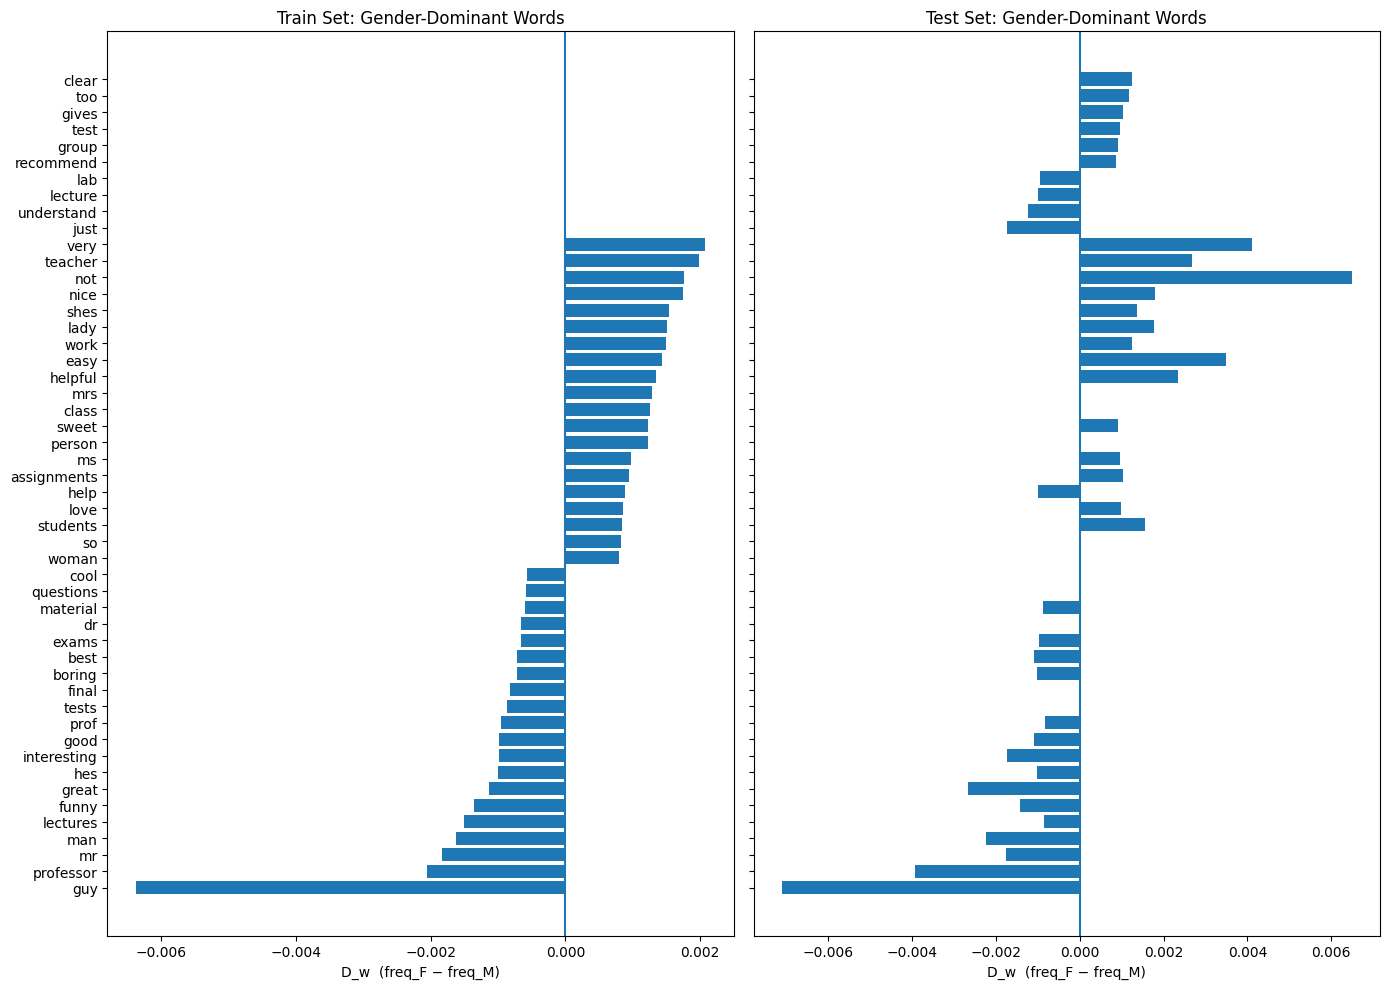

In [ ]:
# Step 6: Draw diverging bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 10), sharey=True)

def plot_diverging(ax, plot_df, title):
    plot_df = plot_df.sort_values('D_w')
    ax.barh(plot_df['word'], plot_df['D_w'])
    ax.set_title(title)
    ax.set_xlabel("D_w  (freq_F − freq_M)")
    ax.axvline(0)

# Train
plot_diverging(axes[0], train_plot_df, "Train Set: Gender-Dominant Words")

# Test
plot_diverging(axes[1], test_plot_df, "Test Set: Gender-Dominant Words")

plt.tight_layout()
plt.show()
